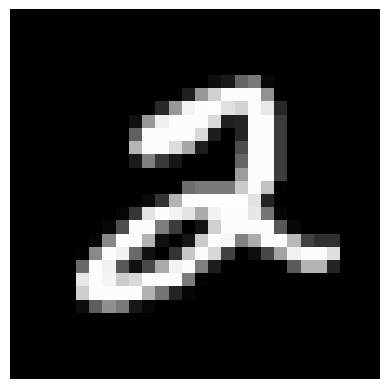

In [7]:
import numpy as np
import struct
import matplotlib.pyplot as plt

# Load images from the MNIST dataset
def load_image_file(filename):
    with open(filename, 'rb') as f:
        # Skip the magic number and number of images
        _, num_images = struct.unpack(">II", f.read(8))
        rows, cols = struct.unpack(">II", f.read(8))  # Image dimensions
        # Read image data and reshape into (num_images, rows*cols)
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows * cols)
    return {'n': num_images, 'x': images}

# Load labels from the MNIST dataset
def load_label_file(filename):
    with open(filename, 'rb') as f:
        # Skip the magic number and number of labels
        _, num_labels = struct.unpack(">II", f.read(8))
        # Read label data
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

# Load training and test datasets
def load_mnist():
    train = load_image_file('mnist/train-images-idx3-ubyte')
    test = load_image_file('mnist/t10k-images-idx3-ubyte')
    
    train['y'] = load_label_file('mnist/train-labels-idx1-ubyte')
    test['y'] = load_label_file('mnist/t10k-labels-idx1-ubyte')
    
    return train, test

# Display an MNIST digit image
def show_digit(arr784):
    plt.imshow(arr784.reshape(28, 28), cmap='gray')
    plt.axis('off')  # Hide axes for cleaner display
    plt.show()

# Load MNIST data
train, test = load_mnist()

# Display an example image (e.g., the 5th training image)
show_digit(train['x'][5])
